In [8]:
#Data Description
import numpy as np
import matplotlib.pyplot as plt
import csv

filename = 'epa_everglades_emap_2014_data_1.csv'

# lists to hold data for each variable
ph_data, do_data, turb_data = [], [], []

with open(filename, 'r', newline='', encoding='utf-8') as file:
    reader = csv.reader(file)
    header = next(reader) 
    header = [col.strip() for col in header]

    # create indices for the required variables
    indices = {var: header.index(var) for var in ['pH', 'TURB', 'DO']}

    for row in reader:
        try:
            # get values needed and make sure it skips missing data
            ph_value = float(row[indices['pH']]) if row[indices['pH']] else np.nan
            do_value = float(row[indices['DO']]) if row[indices['DO']] else np.nan
            turb_value = float(row[indices['TURB']]) if row[indices['TURB']] else np.nan

            # place it in the list 
            if not any(np.isnan(x) for x in [ph_value, do_value, turb_value]):
                ph_data.append(ph_value)
                do_data.append(do_value)
                turb_data.append(turb_value)
        except ValueError:
            pass 

# define variables for analysis
variables = {'pH': ph_data, 'DO': do_data, 'TURB': turb_data}
results = {}

# calculate statistics and create histograms
for var, data in variables.items():
    mean = np.mean(data)
    median = np.median(data)
    std_dev = np.std(data)
    results[var] = {"Mean": mean, "Median": median, "Std Dev": std_dev}

    plt.hist(data, bins=20, color='blue', alpha=0.7, edgecolor='black')
    plt.title(f"Histogram of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.grid(axis='y', alpha=0.75)
    plt.savefig(f"{var}_histogram.png")
    plt.close()

for var, stats in results.items():
    print(f"{var} Statistics:")
    print(f"Mean: {stats['Mean']:.3f}")
    print(f"Median: {stats['Median']:.3f}")
    print(f"Standard Deviation: {stats['Std Dev']:.3f}")

pH Statistics:
Mean: 7.252
Median: 7.260
Standard Deviation: 0.491
DO Statistics:
Mean: 4.624
Median: 3.995
Standard Deviation: 2.650
TURB Statistics:
Mean: 1.430
Median: 0.700
Standard Deviation: 2.151


In [4]:
#Correlation
import numpy as np
import csv
from scipy.stats import pearsonr, spearmanr, linregress
import matplotlib.pyplot as plt

filename = 'epa_everglades_emap_2014_data_1.csv'

#create a place to store the data
ph_data = []
do_data = []
turb_data = []

# read the CSV and extract relevant data
with open(filename, 'r', newline='', encoding='utf-8') as file:
    reader = csv.reader(file)
    header = next(reader)
    header = [col.strip() for col in header]
    
    ph_index = header.index('pH') #find indices of the variables
    do_index = header.index('DO')
    turb_index = header.index('TURB')
    
    for row in reader:
        if len(row) > max(ph_index, do_index, turb_index): 
            try:
                ph_data.append(float(row[ph_index]) if row[ph_index].replace('.', '', 1).isdigit() else None)
                do_data.append(float(row[do_index]) if row[do_index].replace('.', '', 1).isdigit() else None)
                turb_data.append(float(row[turb_index]) if row[turb_index].replace('.', '', 1).isdigit() else None)
            except ValueError:
                pass

# remove values that do not exist
ph_data = np.array([x for x in ph_data if x is not None])
do_data = np.array([x for x in do_data if x is not None])
turb_data = np.array([x for x in turb_data if x is not None])

variables = {'pH': ph_data, 'DO': do_data, 'TURB': turb_data} #variables of interest
pairs = [('pH', 'DO'), ('pH', 'TURB'), ('DO', 'TURB')] #comparison of the variables

for x_var, y_var in pairs:
    x_data = variables[x_var]
    y_data = variables[y_var]
    
    # calculate Pearson and Spearman correlation coefficients
    pearson_corr, _ = pearsonr(x_data, y_data)
    spearman_corr, _ = spearmanr(x_data, y_data)
    
    #linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regression_line = slope * x_data + intercept
    
    print(f"\nCorrelation and Regression: {x_var} vs {y_var}")
    print(f"Pearson Correlation: {pearson_corr:.3f}")
    print(f"Spearman Correlation: {spearman_corr:.3f}")
    print(f"Linear Regression: y = {slope:.3f}x + {intercept:.3f}")
    print(f"R-squared: {r_value**2:.3f}")
    
    # generate scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x_data, y_data, color='blue', alpha=0.7, label='Data Points')
    plt.plot(x_data, regression_line, color='red', label=f'Regression Line: y = {slope:.3f}x + {intercept:.3f}')
    plt.title(f"{x_var} vs {y_var}")
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.legend()
    plt.grid(True)
    plt.savefig(f"{x_var}_vs_{y_var}_scatter.png")
    plt.close()


Correlation and Regression: pH vs DO
Pearson Correlation: 0.642
Spearman Correlation: 0.765
Linear Regression: y = 3.470x + -20.540
R-squared: 0.413

Correlation and Regression: pH vs TURB
Pearson Correlation: -0.182
Spearman Correlation: -0.350
Linear Regression: y = -0.796x + 7.204
R-squared: 0.033

Correlation and Regression: DO vs TURB
Pearson Correlation: -0.068
Spearman Correlation: -0.197
Linear Regression: y = -0.055x + 1.686
R-squared: 0.005


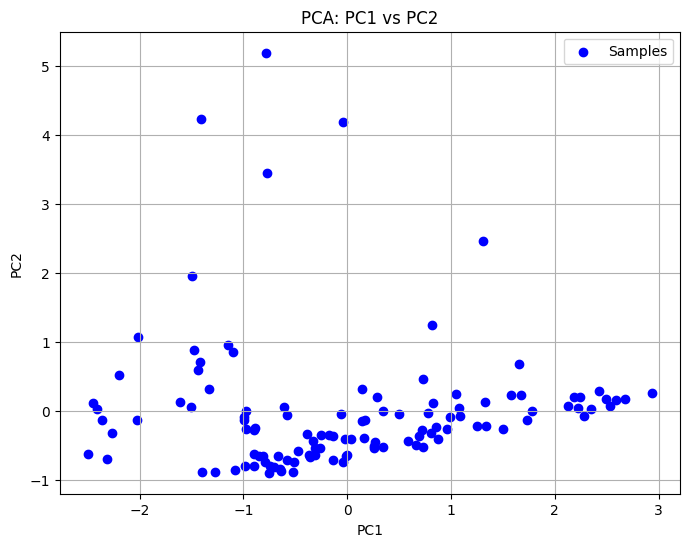

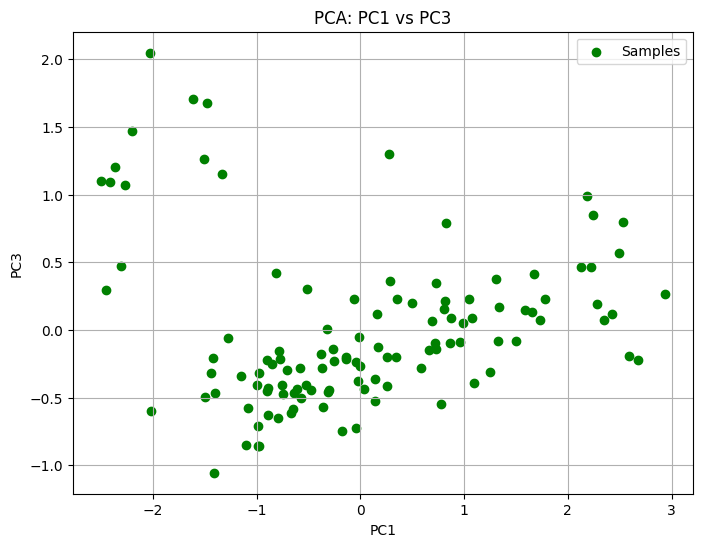

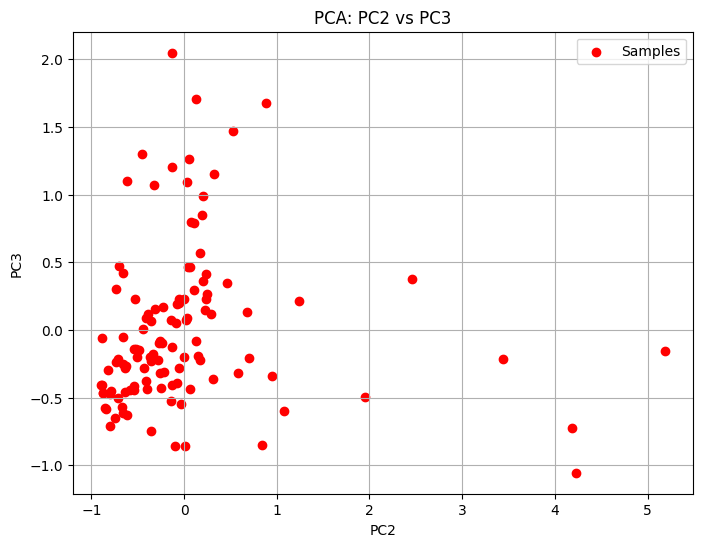

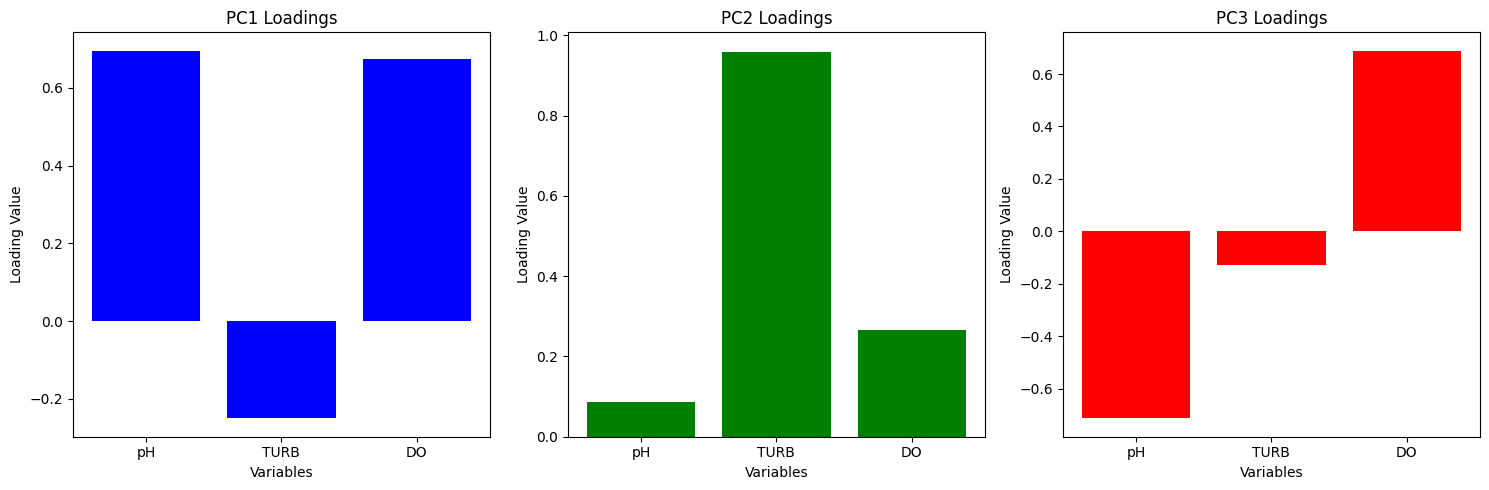

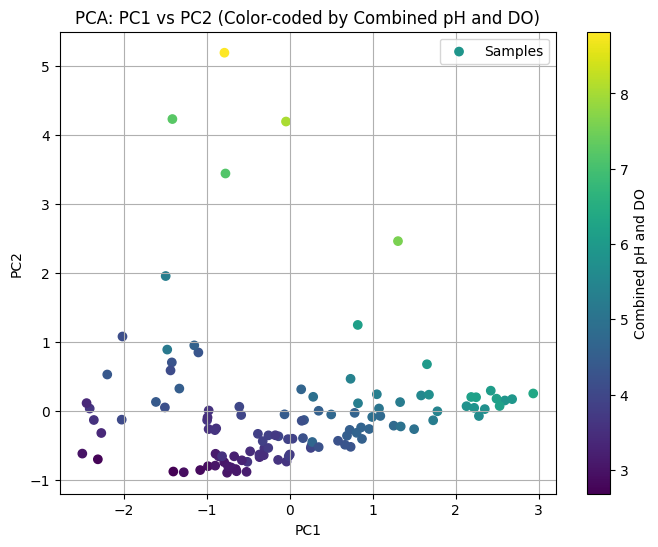

In [16]:
#Dimensionality reduction
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.decomposition import PCA

filename = 'epa_everglades_emap_2014_data_1.csv' 
data_matrix = []
with open(filename, 'r', newline='', encoding='utf-8') as file:
    reader = csv.reader(file)
    header = next(reader)
    header = [col.strip() for col in header]
    numeric_columns = ['pH', 'TURB', 'DO']  
    indices = [header.index(col) for col in numeric_columns]

    for row in reader:
        try:
            # Extract the numeric values for the specified variables
            row_data = [float(row[idx]) if row[idx].replace('.', '', 1).isdigit() else np.nan for idx in indices]

            # Only append if no NaN values
            if all(not np.isnan(val) for val in row_data):
                data_matrix.append(row_data)
        except ValueError:
            pass

data_matrix = np.array(data_matrix)
mean = np.mean(data_matrix, axis=0)
std_dev = np.std(data_matrix, axis=0)
standardized_data = (data_matrix - mean) / std_dev

#PCA with 3 components, my three main numerical values
pca = PCA(n_components=3)
pca.fit(standardized_data)
scores = pca.transform(standardized_data)

# plot PC1 vs PC2
plt.figure(figsize=(8, 6))
plt.scatter(scores[:, 0], scores[:, 1], c='blue', label='Samples')
plt.title('PCA: PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.legend()
plt.show()

# plot PC1 vs. PC3
plt.figure(figsize=(8, 6))
plt.scatter(scores[:, 0], scores[:, 2], c='green', label='Samples')
plt.title('PCA: PC1 vs PC3')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.grid(True)
plt.legend()
plt.show()

# plot PC2 vs. PC3
plt.figure(figsize=(8, 6))
plt.scatter(scores[:, 1], scores[:, 2], c='red', label='Samples')
plt.title('PCA: PC2 vs PC3')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.grid(True)
plt.legend()
plt.show()

#principle component weights
loadings = pca.components_

plt.figure(figsize=(15, 5))
#PC1
plt.subplot(1, 3, 1)
plt.bar(numeric_columns, loadings[0], color='blue')
plt.title('PC1 Loadings')
plt.xlabel('Variables')
plt.ylabel('Loading Value')
# PC2
plt.subplot(1, 3, 2)
plt.bar(numeric_columns, loadings[1], color='green')
plt.title('PC2 Loadings')
plt.xlabel('Variables')
plt.ylabel('Loading Value')
# PC3
plt.subplot(1, 3, 3)
plt.bar(numeric_columns, loadings[2], color='red')
plt.title('PC3 Loadings')
plt.xlabel('Variables')
plt.ylabel('Loading Value')

plt.tight_layout()
plt.show()

#color coded PCA plot
combined_values = np.mean(data_matrix, axis=1)  # Combine by averaging pH and DO values
plt.figure(figsize=(8, 6))
scatter = plt.scatter(scores[:, 0], scores[:, 1], c=combined_values, cmap='viridis', label='Samples')
plt.title('PCA: PC1 vs PC2 (Color-coded by Combined pH and DO)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter, label='Combined pH and DO')
plt.grid(True)
plt.legend()
plt.show()